In [5]:
import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.utils import plot_model

# 1.5 OS related
import os, time

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics

In [28]:
# B. Define constants

# 2. Our constants
# 2.1 Dimensions to which our images will be adjusted
img_width, img_height = 150, 150

# 2.2 Data folder containing all training images, maybe in folders: cats and dogs

train_data_dir = r"D:\chest_xray\train"
test_data_dir =  r"D:\chest_xray\test"

# 2.3 What is the total number of training images
#      that should be generated (not what are available)
nb_train_samples = 1341+3875   # Actual: 1000 + 1000 (more) =    2000

# 2.4 Data folder containing all validation images

validation_data_dir = r"D:\chest_xray\val"

# 2.5 What is the total no of validation samples that should
#     be generated?
nb_validation_samples = 16   # Actual: 8 + 8 (more) =  16

# Some hyperparameters

# 2.6 Batch size to train at one go:
batch_size = 32             # No of batches = 5216/163 = 32
                            # So per epoch we have 32 batches

# 2.7 How many epochs of training?
epochs = 5                  # For lack of time, let us make it just 5.
# 2.8 No of test samples
test_generator_samples = 390+234

# 2.9 For test data, what should be batch size
test_batch_size = 16    # This is different from training batch size

# 2.10
input_shape = (img_width, img_height, 3)

In [53]:

model = Sequential()

In [54]:
model.add(Input(shape = input_shape ))

In [55]:
model.add(Conv2D(
    filters=32,
    kernel_size= (3,3),
    strides = (1,1),
    use_bias = True,
    padding='valid',
    activation='relu'
    
)
         )


        

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.add(Conv2D(
    filters=64,
    kernel_size= (3,3),
    activation='relu'
    
)
         )

In [58]:
model.add(MaxPool2D())

In [59]:

model.add(Conv2D(
    filters=32,
    kernel_size= (3,3),
    activation= 'relu'
))

In [60]:
model.add(MaxPool2D())

In [61]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
Total params: 37,856
Trainable params: 37,856
Non-trai

In [62]:

model.add(Flatten())

In [63]:

model.add(Dense(256, activation='relu'))

In [64]:


model.add(Dropout(rate=0.2))

In [65]:

model.add(Dense(64, activation='relu'))

In [66]:

model.add(Dropout(rate=0.2))
     

In [67]:


model.add(Dense(1, activation='sigmoid'))

In [68]:

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [69]:
tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255, 
                              shear_range=0.2,    
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [70]:

train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,     
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,  
                                               class_mode='binary'   
                                                )

Found 5216 images belonging to 2 classes.


In [71]:
val_dtgen= ImageDataGenerator(rescale=1. / 255)

In [72]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),   # Resize images
                                                     batch_size=batch_size,    # batch size to augment at a time
                                                     class_mode='binary'  # Return 1D array of class labels
                                                     )

Found 16 images belonging to 2 classes.


In [73]:
start = time.time()
history = model.fit_generator(
                              # First argument is always data generator
                              generator = train_generator,
                              # How many batches per epoch?
                              # Can be any number as generator loops indefinitely
                              steps_per_epoch=nb_train_samples // batch_size,
                              # No of epochs
                              epochs=epochs,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60  # 10min

C:\Users\ubuntu\AppData\Local\Temp\ipykernel_42204\2386527620.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 122s 739ms/step - loss: 0.4401 - accuracy: 0.8090
Epoch 2/5
163/163 [==============================] - 122s 747ms/step - loss: 0.2547 - accuracy: 0.8970
Epoch 3/5
163/163 [==============================] - 123s 753ms/step - loss: 0.2150 - accuracy: 0.9172
Epoch 4/5
163/163 [==============================] - 122s 749ms/step - loss: 0.1843 - accuracy: 0.9271
Epoch 5/5
163/163 [==============================] - 126s 769ms/step - loss: 0.1734 - accuracy: 0.9319


10.253315047423046

In [74]:
# 7.0 Model evaluation

# 7.1 Using generator
#     https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4        # How many batches
                        )


# 7.1.1
result     # ['loss', 'accuracy']

4/4 [==============================] - 0s 13ms/step - loss: 0.6384 - accuracy: 0.7500


[0.6383972764015198, 0.75]

In [75]:

# 8.0 Make predictions

# 8.1 Using generator
#     https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
pred = model.predict(validation_generator, steps = 2)

# 8.1.1
pred[:5]


2/2 [==============================] - 0s 24ms/step


array([[0.9952099 ],
       [0.9833048 ],
       [0.07333884],
       [0.07285789],
       [0.44681916]], dtype=float32)

In [76]:

# 9.0 Augmentation configuration we will use
#     for test-data. Only rescaling of pixels

test_dtgen = ImageDataGenerator(rescale=1. / 255)

# 9.0.1 Test data

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )
     

Found 624 images belonging to 2 classes.


In [77]:
# 9.0.2 Get iterator
#       and a batch of (images, image_labels)
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(32, 150, 150, 3)

1/1 [==============================] - 0s 165ms/step


ValueError: num must be 1 <= num <= 16, not 17

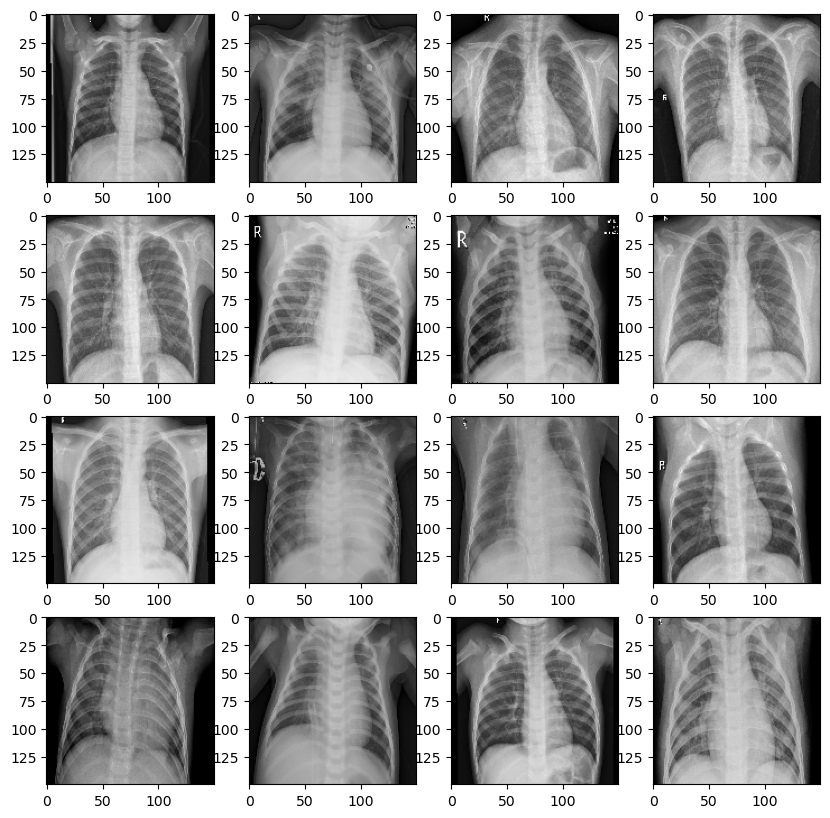

In [78]:

# 9.1 Make predictions
results = model.predict(images[0])

# 9.2 Plot the images and check with
#     results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;
# 9.3 Predicted labels
print(results)         # Probability values
                       
     